### 1. Library

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

### 2. Data Loading

In [2]:
# Read Data
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')

# Data Head
data

,USD
date,
2010-01-04,1161.0
2010-01-05,1147.3
2010-01-06,1141.4
2010-01-07,1132.0
2010-01-08,1134.1
...,...
2020-01-10,1160.0
2020-01-13,1161.1
2020-01-14,1155.7


### 3. Data Shfit 생성

In [3]:
# Input에 포함시킬 기간
PAST_DAYS = 250

# Data Shfit 생성    
cnt = ['USD']
for step1 in cnt : 
    for step2 in range(1,PAST_DAYS+1):
        data['{}_shift-{}'.format(step1,step2)] = data[step1].shift(step2)
        
# Nan Omit
data = data.dropna()

# Data Head
data

,USD,USD_shift-1,USD_shift-2,USD_shift-3,USD_shift-4,USD_shift-5,USD_shift-6,USD_shift-7,USD_shift-8,USD_shift-9,...,USD_shift-241,USD_shift-242,USD_shift-243,USD_shift-244,USD_shift-245,USD_shift-246,USD_shift-247,USD_shift-248,USD_shift-249,USD_shift-250
date,,,,,,,,,,,,,,,,,,,,,
2010-12-30,1140.6,1147.7,1147.3,1150.9,1154.2,1152.9,1155.5,1156.3,1167.1,1151.8,...,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4,1147.3,1161.0
2010-12-31,1134.8,1140.6,1147.7,1147.3,1150.9,1154.2,1152.9,1155.5,1156.3,1167.1,...,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4,1147.3
2011-01-03,1128.0,1134.8,1140.6,1147.7,1147.3,1150.9,1154.2,1152.9,1155.5,1156.3,...,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0,1141.4
2011-01-04,1123.2,1128.0,1134.8,1140.6,1147.7,1147.3,1150.9,1154.2,1152.9,1155.5,...,1128.0,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1,1132.0
2011-01-05,1124.1,1123.2,1128.0,1134.8,1140.6,1147.7,1147.3,1150.9,1154.2,1152.9,...,1137.9,1128.0,1123.4,1128.4,1122.2,1123.1,1127.0,1123.3,1121.3,1134.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-10,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,1160.9,1161.2,...,1121.4,1122.0,1120.1,1121.4,1117.6,1118.9,1121.6,1121.7,1118.0,1125.2
2020-01-13,1161.1,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,1160.9,...,1121.3,1121.4,1122.0,1120.1,1121.4,1117.6,1118.9,1121.6,1121.7,1118.0
2020-01-14,1155.7,1161.1,1160.0,1174.1,1165.3,1169.6,1162.7,1156.9,1157.8,1157.8,...,1126.5,1121.3,1121.4,1122.0,1120.1,1121.4,1117.6,1118.9,1121.6,1121.7


### 4. Target, Input 지정

In [4]:
# X, y
X = data[data.columns[1:]]
y = data[data.columns[0]]

# X 순서 뒤집기
X = X[X.columns[::-1]]

### 5. MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 100))
X = sc_X.fit_transform(X)
sc_y = MinMaxScaler()
y = sc_y.fit_transform(y.values.reshape(-1,1))

### 6. Train Validation Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

### 7. Dataset Size

In [7]:
print('Train Set Size : {:,} obs' .format(len(X_train)))
print('Valid Set Size : {:,} obs' .format(len(X_valid)))
print('Test Set Size : {:,} obs' .format(len(X_test)))

Train Set Size : 1,608 obs
Valid Set Size : 403 obs
Test Set Size : 224 obs


### 8. Keras Seed

In [8]:
from tensorflow import set_random_seed
set_random_seed(1234)

### 9. DataSet For LSTM

In [9]:
X_train_t = X_train.reshape(X_train.shape[0], 250, 1)
X_valid_t = X_valid.reshape(X_valid.shape[0], 250, 1)
X_test_t = X_test.reshape(X_test.shape[0], 250, 1)

### 10. LSTM Structure

In [13]:
# Library
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation

# Model Structure
import keras.backend.tensorflow_backend as K
with K.tf.device('/gpu:0'):
    
    # Sequential Model 
    K.clear_session() 
    model = Sequential()

    # LSTM Layer
    model.add(LSTM(100, input_shape=(250,1))) # (timestep, feature) 
    model.add(Dense(1))

    # 결과
    model.compile(loss='mean_squared_error', optimizer='adam') 
    
    # Model Structure
    model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### 11. Model Score

In [14]:
import keras.backend.tensorflow_backend as K
with K.tf.device('/gpu:0'):
    
    # Early Stopping
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=1)
    
    # Model Fitting
    model.fit(X_train_t, y_train, epochs=300, batch_size=100, verbose=1, callbacks=[early_stop])


Epoch 1/300
1608/1608 [==============================] - 5s 3ms/step - loss: 0.5859
Epoch 2/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0489
Epoch 3/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0204
Epoch 4/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0125
Epoch 5/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0065
Epoch 6/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0029
Epoch 7/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 8/300
1608/1608 [==============================] - 4s 2ms/step - loss: 0.0016
Epoch 9/300
1608/1608 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 10/300
1608/1608 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 11/300
1608/1608 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 12/300
1608/1608 [==============================] - 4s 3ms/step - l

### 11. Model RMSE

In [16]:
from sklearn.metrics import mean_squared_error

# Train
pred_train = model.predict(X_train_t)
print("Train rmse : {}" .format(mean_squared_error(y_train, pred_train)**0.5))

# Valid
pred_valid = model.predict(X_valid_t)
print("Valid rmse : {}" .format(mean_squared_error(y_valid, pred_valid)**0.5))

# Test
pred_test = model.predict(X_test_t)
print("Test rmse : {}" .format(mean_squared_error(y_test, pred_test)**0.5))

Train rmse : 0.026041937651130862
Valid rmse : 0.02688130991340827
Test rmse : 0.025404404195761714


### 12. Data Scale 원래 데이터로 변환

In [17]:
# Data Reverse
y_test_origin = sc_y.inverse_transform(y_test)
y_pred_origin = sc_y.inverse_transform(pred_test.reshape(-1,1))

# Test Data
test = np.array([y_test_origin.reshape(-1), y_pred_origin.reshape(-1)]).transpose()
test = pd.DataFrame(test, columns = ['y_test', 'y_pred'])

### 13. 1일 뒤 예측 시각화

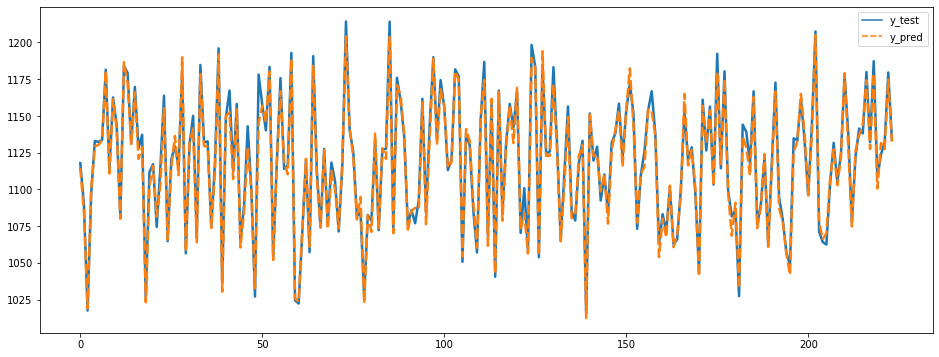

In [18]:
# Pred vs True Visualization
plt.figure(figsize = (16,6))
sns.lineplot(data = test, linewidth = 2.5)
plt.show()

### 14. 2019년 예측

In [19]:
# Date for 2019
date_list = pd.date_range('2019-01-02','2020-01-15', freq='B')
date_list = list(date_list.strftime('%Y-%m-%d'))

In [20]:
# Virtual Data Setting
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[1977:2227]

In [21]:
# Virtual Prediction
for step in date_list :
    
    # Prediction
    virtual_X = sc_X.transform(np.array(data[-250:].T))
    virtual_train_t = virtual_X.reshape(virtual_X.shape[0], 250, 1)
    pred = sc_y.inverse_transform(model.predict(virtual_train_t).reshape(-1,1)).reshape(-1)[0]
    pred_df = pd.DataFrame({'USD' : pred}, index=[step])

    # Data Append
    data = data.append(pred_df)

### 15. 결과 DataFrame으로 변환

In [22]:
# Virtual 2019 ~ 2020 Data
data = data[250:]
usd_pred = data
usd_pred.columns = ['USD_PRED']

In [23]:
# Real 2019 ~ 2020 Data
data = pd.read_csv('./data/DAILY_DATA.csv')
data = data[['date', 'USD']].set_index('date')
data = data[2227:-1]
usd_true = data
usd_true.columns = ['USD_TRUE']

In [24]:
# Concat
virtual_data = pd.concat([usd_true, usd_pred], axis=1)

In [25]:
# NaN Omit
virtual_data = virtual_data.dropna()

In [26]:
# Result
virtual_data

,USD_TRUE,USD_PRED
2019-01-02,1118.1,1116.059326
2019-01-03,1119.0,1114.025269
2019-01-04,1127.5,1111.994995
2019-01-07,1125.2,1109.979492
2019-01-08,1118.0,1107.991333
...,...,...
2020-01-09,1174.1,1053.631592
2020-01-10,1160.0,1053.631348
2020-01-13,1161.1,1053.631104
2020-01-14,1155.7,1053.630859


### 16. 2019년 1년의 RMSE

In [27]:
# RMSE
from sklearn.metrics import mean_squared_error
print("rmse : {}" .format(mean_squared_error(virtual_data['USD_TRUE'], virtual_data['USD_PRED'])**0.5))

rmse : 113.56181179789705


### 17. Pred vs True Visualization

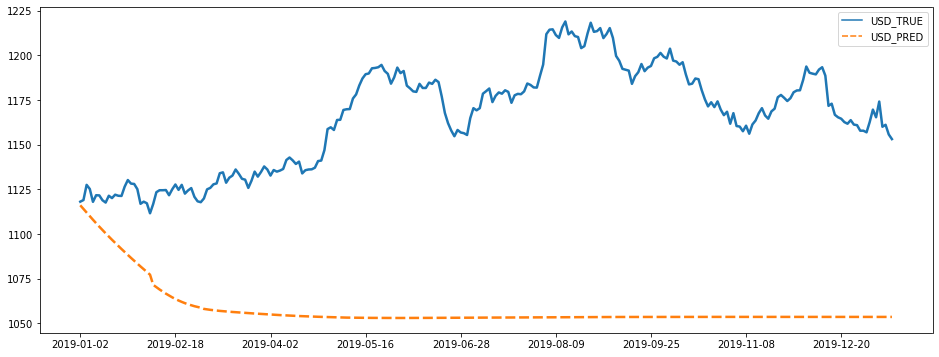

In [28]:
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = virtual_data, linewidth = 2.5)
ax.set(xticks=virtual_data.index[0::30])
plt.show()

### 18. 만약 3개월만 예측을 한다면...?

rmse : 56.67079366459138
percent rmse : 226.68%


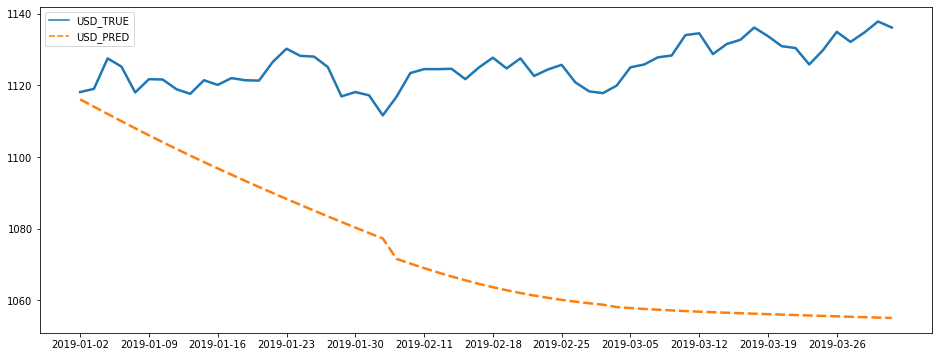

In [29]:
# Result
virtual_data = virtual_data[0:60]

# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(virtual_data['USD_TRUE'], virtual_data['USD_PRED'])**0.5
print("rmse : {}" .format(rmse))
print("percent rmse : {:.2f}%" .format(100 * rmse / (1140-1115)))

# Pred vs True Visualization
plt.figure(figsize = (16,6))
ax = sns.lineplot(data = virtual_data, linewidth = 2.5)
ax.set(xticks=virtual_data.index[0::5])
plt.show()